In [9]:
import pandas as pd
import json

# Load the data into a DataFrame
with open('grandmasterData.json') as f:
    gdData = f.read()
gdDict = json.loads(gdData)
placements = []
traits = []
augments = []
units = []

for summonerID in gdDict.keys():
    for i in range(len(gdDict[summonerID])):
        for puuid, dataDict in gdDict[summonerID][i].items():
            placements.append(dataDict["placement"])
            traits.append(dataDict["traits"])
            augments.append(dataDict["augments"])
            units.append(dataDict["units"])

df = pd.DataFrame()
df["placement"] = placements
df["traits"] = traits
df["augments"] = augments
df["units"] = units

# Select data for the top 1 player
top1_data = df[df['placement'] == 1]

# Get the top 1 player's traits
top1_traits = top1_data['traits'].explode().value_counts().head(5)

# Get the top 1 player's augments
top1_augments = top1_data['augments'].explode().value_counts().head(5)

# Get the top 1 player's units
top1_units = top1_data['units'].explode().value_counts().head(5)

# Print the top 1 player's traits
print("Top 1 Player's Traits:")
print(top1_traits)

# Print the top 1 player's augments
print("\nTop 1 Player's Augments:")
print(top1_augments)

# Print the top 1 player's units
print("\nTop 1 Player's Units:")
print(top1_units)


Top 1 Player's Traits:
traits
Set10_Guardian     3776
Set10_Brawler      3696
Set10_Quickshot    3691
Set10_Fighter      3489
Set10_Jazz         3368
Name: count, dtype: int64

Top 1 Player's Augments:
augments
TFT10_Augment_InspiringEpitaph      421
TFT9_Augment_JeweledLotus           403
TFT10_Augment_Vampirism             394
TFT10_Augment_VampirismPlus         379
TFT9_Augment_GreaterJeweledLotus    328
Name: count, dtype: int64

Top 1 Player's Units:
units
TFT10_Lucian         3202
TFT10_Illaoi         2882
TFT10_MissFortune    2741
TFT10_Bard           2205
TFT10_Yorick         2198
Name: count, dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

def makeplot_top4(str, top4):
    cols = top4.filter(like=f'{str}')
    cols_sums = cols.sum()
    column_sums_sorted = cols_sums.sort_values(ascending=False)
    column_sums_filtered = column_sums_sorted.head(5)  # Reduced to top 5 items

    plt.figure(figsize=(8, 6))  # Adjusted figure size
    bars = plt.bar(range(len(column_sums_filtered)), column_sums_filtered)

    plt.xticks(range(len(column_sums_filtered)), column_sums_filtered.index, rotation=45, ha='right')

    plt.title(f'Count of Top 5 {str.capitalize()}s Used by Top 4 Winners in Grand Master Matches')
    plt.xlabel(f'{str.capitalize()}')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Load the data into a DataFrame
with open('grandmasterData.json') as f:
    gdData = f.read()
gdDict = json.loads(gdData)

# Extract data from the dictionary
placements = []
traits = []
augments = []
units = []

for summonerID in gdDict.keys():
    for i in range(len(gdDict[summonerID])):
        for puuid, dataDict in gdDict[summonerID][i].items():
            placements.append(dataDict["placement"])
            traits.append(','.join(dataDict["traits"]))  # Convert list to string
            augments.append(','.join(dataDict["augments"]))  # Convert list to string
            units.append(','.join(dataDict["units"]))  # Convert list to string

# Create a DataFrame
df = pd.DataFrame({
    "placement": placements,
    "traits": traits,
    "augments": augments,
    "units": units
})

# Select data for the top 4 players based on their placement
top4 = df[df['placement'] <= 4]  # Assuming top 4 players

# Plot top 5 units, augments, and traits for the top 4 players
makeplot_top4('units', top4)
makeplot_top4('augments', top4)
makeplot_top4('traits', top4)


In [10]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_reg_model.predict(X_test)

# Evaluate the model
# Since linear regression is used, we can't calculate accuracy or use classification report.
# Instead, we can evaluate the model using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)



Mean Absolute Error (MAE): 9691096510.248236
Mean Squared Error (MSE): 8.54746401937134e+22
R-squared: -1.6251929281841466e+22


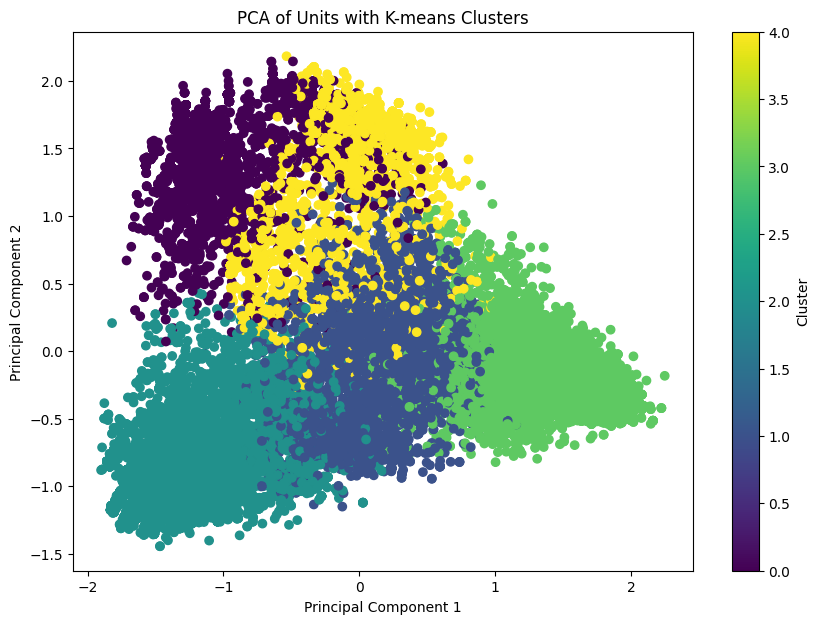

In [1]:
 import pandas as pd
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 假设 'gdDict' 是从您的 'grandmasterData.json' 文件加载的数据
with open('grandmasterData.json') as f:
    gdDict = json.load(f)

placements = []
traits = []
augments = []
units = []

# 填充数据列表
for summonerID in gdDict.keys():
    for i in range(len(gdDict[summonerID])):
        for puuid, dataDict in gdDict[summonerID][i].items():
            placements.append(dataDict["placement"])
            traits.append(dataDict["traits"])
            augments.append(dataDict["augments"])
            units.append(dataDict["units"])

# 创建DataFrame
df = pd.DataFrame({
    "placement": placements,
    "traits": traits,
    "augments": augments,
    "units": units,
})

# 使用MultiLabelBinarizer转换traits, units, augments
mlb = MultiLabelBinarizer()
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('traits')),
                          columns=mlb.classes_,
                          index=df.index).add_prefix("trait_"))
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('units')),
                          columns=mlb.classes_,
                          index=df.index).add_prefix("unit_"))
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('augments')),
                          columns=mlb.classes_,
                          index=df.index).add_prefix("augment_"))

# 仅选择包含'unit_'的列来进行聚类
unit_cols = df.filter(like='unit_')
# 使用PCA降维以可视化
pca = PCA(n_components=2)
unit_cols_reduced = pca.fit_transform(unit_cols)

# K-means聚类
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(unit_cols)

# 将聚类结果附加到降维后的数据上
df_reduced = pd.DataFrame(unit_cols_reduced, columns=['PC1', 'PC2'])
df_reduced['cluster'] = clusters

# 可视化聚类结果
plt.figure(figsize=(10, 7))
plt.scatter(df_reduced['PC1'], df_reduced['PC2'], c=df_reduced['cluster'], cmap='viridis')
plt.title('PCA of Units with K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
